In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import log2

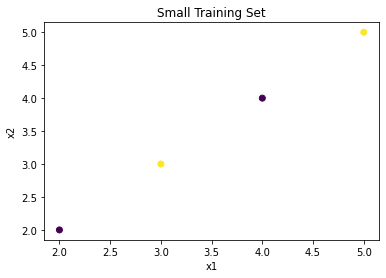

In [2]:
# Question 2 - 2
x_1 = [2.0, 3.0, 4.0, 5.0]
x_2 = [2.0, 3.0, 4.0, 5.0]
y = [0, 1, 0, 1]

plt.scatter(x_1, x_2, c=y, cmap='viridis')
plt.title('Small Training Set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
# functions for Question 2 - 3

In [4]:
def entropy(data):
    new_data, count = np.unique(data, return_counts=True)
    prob = count / len(data)
    return -np.sum(prob * np.log2(prob)) # entropy calculation

In [5]:
def info_gain(data, candidate, t):
    left = data[data[candidate] >= t]
    right = data[data[candidate < t]]
    e_parent = entropy(data['y'])
    e_left = entropy(left['y'])
    e_right = entropy(right['y'])
    w_left = len(left)/len(data)
    w_right = len(right)/len(data)
    
    info_gain = e_parent - (w_left * e_left + w_right * e_right)
    info_gain_ratio = info_gain / (-np.sum([w_left * np.log2(w_left), w_right * np.log2(w_right)]))
    
    return info_gain, info_gain_ratio

In [6]:
def info_gain_ratio_calculation(data):
    x1_ = data
    info_gain_ratios_ = []
    for x in x1_:
        if len(data >= x) > 1:
            info_gain_ratio, info_gain_ = info_gain(data, 'x1', x)
            info_gain_ratios_.append((x, info_gain_ratio, info_gain_))
        else:
            info_gain_ratios_.append((x, info_gain_, info_gain_))
    return info_gain_ratios

In [7]:
# # Question 2 - 3
# data = pd.read_csv('data/Druns.txt', sep=' ', names=['x1', 'x2', 'y'])

# # results
# info_gain_ratios_x1 = info_gain_ratio_calculation(data['x1'])
# info_gain_ratios_x1 = pd.DataFrame(info_gain_ratios_x1, columns=['threshold_x1', 'info_gain_ratio', 'info_gain'])
# info_gain_ratios_x2 = info_gain_ratio_calculation(data['x2'])
# info_gain_ratios_x2 = pd.DataFrame(info_gain_ratios_x2, columns=['threshold_x1', 'info_gain_ratio', 'info_gain'])

In [8]:
# Question 2 - 4
data = pd.read_csv('data/D3leaves.txt', sep=' ', names=['x1', 'x2', 'y'])
data

,x1,x2,y
0,10,1,1
1,10,2,1
2,10,3,1
3,1,1,0
4,1,3,1


### We would build a decision tree using a self-defined node class since we cannot use scikit learn. However, we can use a manual tree classifier - a simple tree based on Occam's razor would have two levels - this tree would be classified based on the input features - if x1 is 10 then the label would be 1 else we consider both x1 and x2. If x1 is 1 and x2 is 1 the label is 0, and if x1 is 1 and x2 is 3 then the label is 1 again (leaf node again).

### Manually converting this to logic rules:
### if x1 == 10: class is 1
### if x1 == 1 and x2 == 1: class is 0
### if x1 == 1 and x2 == 3: class is 1